## Forecasting SSH with the qsgw-DI model
(Jupyter Notebook prepared by Redouane Lguensat & Clément Ubelmann, 2018)

In [1]:
import sys
print (sys.version)

2.7.14 |Anaconda, Inc.| (default, Dec  7 2017, 11:07:58) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
import sys,os,shutil
import numpy
import matplotlib.pylab as plt
import time
import netCDF4 as nc
import qgsw

In [3]:
file='ssh.nc'
fid = nc.Dataset(file)
lon1d=numpy.array(fid.variables["lon"][:]).squeeze()
lat1d=numpy.array(fid.variables["lat"][:]).squeeze()
lon,lat=numpy.meshgrid(lon1d,lat1d)
SSH=numpy.array(fid.variables["SSH"][:,:]).squeeze()

/Users/redouanelg/anaconda3/envs/p2env/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater


In [4]:
# Set constant Rossby first baroclinic phase speed to constant value
c=SSH*0. + 2.5 # in m/s

tint=86400*5 # Time of propagator integration in seconds. Can be positive or negative
deltat=86400*1 # Time period of outputs
dt=600 # propagator time step

## Applying the QGSW operator

In [5]:
Hf,trash=qgsw.qgsw(Hi=SSH, c=c, lon=lon, lat=lat, tint=tint, dtout=deltat, dt=dt,rappel=None,snu=0.)

## Saving the result

In [6]:
for it in range(numpy.shape(Hf)[0]):
    print it
    ncout = nc.Dataset('OUTPUT/ssh_'+str(it)+'.nc', 'w', format='NETCDF3_CLASSIC')
    ncout.createDimension('x', lon1d.shape[0])
    ncout.createDimension('y', lat1d.shape[0])
    ncout.createDimension('time', None)
    nclon = ncout.createVariable('lon', 'f', ('x',))
    nclat = ncout.createVariable('lat', 'f', ('y',))
    nctim = ncout.createVariable('time', 'f', ('time',))
#   nchei = ncout.createVariable('SSH', 'f', ('time','y','x',))
    nchei = ncout.createVariable('SSH', 'f', ('y','x',))
    nclon[:] = lon1d[:]
    nclat[:] = lat1d[:]
#nctim[:]=range(0,tint+deltat,deltat)
    nctim[:]=deltat*it
#nchei[:,:,:] = Hf[:,:,:]
    nchei[:,:] = Hf[it,:,:]
    ncout.close()

0
1
2
3
4
5


## Plot

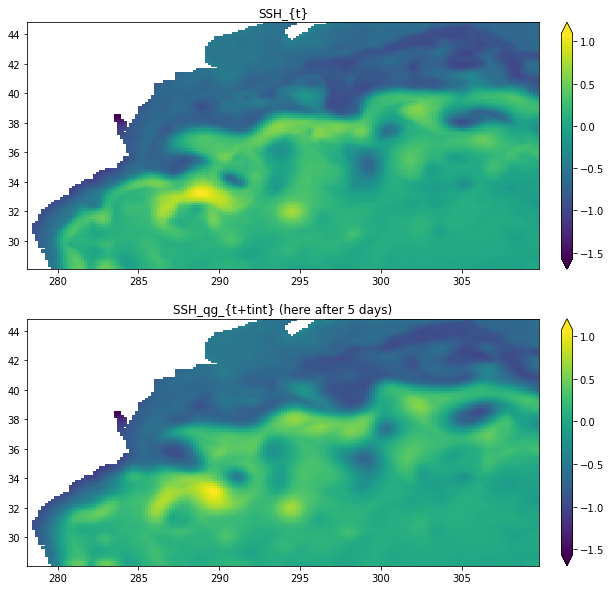

In [7]:

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.pcolormesh(lon,lat,SSH)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('SSH_{t}');

plt.subplot(212)
plt.pcolormesh(lon,lat,Hf[-1,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('SSH_qg_{t+tint} (here after 5 days)');

